# Biclustering

Idea: tenemos un conjunto de porcentaje de flores que florecen en cada época del año. Buscamos encontrar clusters de meses y flores.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df_flores = pd.read_csv("/content/drive/MyDrive/Datamecum/PSD3/Biclustering/data/flores_estaciones.csv")

In [13]:
df_flores

Abelia      Adelfa    Amarilis     Amapola     Anturio       Áster  \
0     0.000000   79.413739   89.594811   88.687153   17.622351   16.583976   
1    15.151896   24.747507   39.687510   13.965998   27.222596    2.536969   
2    18.034298   28.709794   86.241641   84.157997    0.000000   32.961421   
3    32.164068   24.586247    0.000000   11.114732    8.427070   48.708900   
4    49.917282   90.990570  100.000000  100.000000   26.412708   13.325692   
5    33.080753   72.465054   63.124828   70.325608   54.077029    0.000000   
6   100.000000    8.928057   29.500238    0.000000   54.024447  100.000000   
7    20.149259  100.000000   74.633816   59.862795   30.942573   18.074904   
8    49.348629   72.029691   54.109486   76.008184   42.992638   13.944735   
9    22.607816   67.871441   81.630329   48.413814   16.046964    4.906529   
10   95.543530    0.000000   25.711498   24.173197  100.000000   77.852500   
11   30.117883   75.248531   62.825033   97.705810    8.430879   16.632517   

       Azafrán      Azalea  Ave del paraíso     Begonia       Brezo  \
0     3.608166   73.402111        67.609506   99.173715   66.660080   
1     4.828614   19.992289       100.000000   43.737325   25.374789   
2     0.000000   96.337749        21.118459   67.475904   86.958660   
3    25.297383   40.236531        95.276986    0.000000    0.000000   
4    10.710786   77.533552        40.125245  100.000000   83.166476   
5    24.934755   69.816013        21.715665   55.106249   87.105982   
6    58.930001    5.932668        16.343528   22.516634   41.822573   
7    31.129716  100.000000        26.586739   47.478228   71.347143   
8     6.804772   69.869784        19.394817   82.286293   99.805210   
9    19.189635   63.639746        41.318985   51.894932  100.000000   
10  100.000000    0.000000         0.000000   32.361674   83.607214   
11    7.826974   89.957413        57.153665   87.303605   99.469055   

    Cactus de Navidad        Cala     Camelia  Campanilla    Ciclamen  \
0           52.324691  100.000000   52.511984   99.803717  100.000000   
1           78.496711   47.439046   23.989813   30.726083   47.998169   
2            1.591228   61.409312   93.323806   76.461553   74.073563   
3          100.000000   18.232698   26.021695    7.148868    0.000000   
4            5.756255   70.189958  100.000000   48.725705   83.510162   
5            0.000000   87.821896   86.160119   74.024334   60.361702   
6            8.755724    0.000000    0.000000   10.913009   14.094138   
7           20.593304   69.975087   40.103649   94.498503   80.246895   
8           20.377110   97.271983   66.393053   87.428506   76.585136   
9           10.980433   61.615648   49.162433   82.869408   86.484382   
10          26.178659   46.344805   31.815446    0.000000   47.439398   
11          14.401621   89.885254   73.790393  100.000000   81.473110   

        Clavel  Crisantemo  
0     0.000000   58.026357  
1    43.183601    0.000000  
2     9.530775   56.009515  
3    66.631255   49.200645  
4    38.874733   55.759003  
5    35.937778   79.654927  
6   100.000000   31.952268  
7    38.293964   83.780399  
8    12.313441   40.558928  
9    72.277063   71.152497  
10   84.273980    6.499734  
11   60.359384  100.000000

# Trabajamos con los datos

# Clustering

Aplicamos clustering (con tantas features puede no ser buena idea...)

## kmeans

In [14]:
from sklearn.cluster import KMeans

In [15]:
# aplicamos el algoritmo de kmeans:

kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_flores.values)
kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int32)

In [16]:
df_flores['kmeans'] = kmeans.labels_

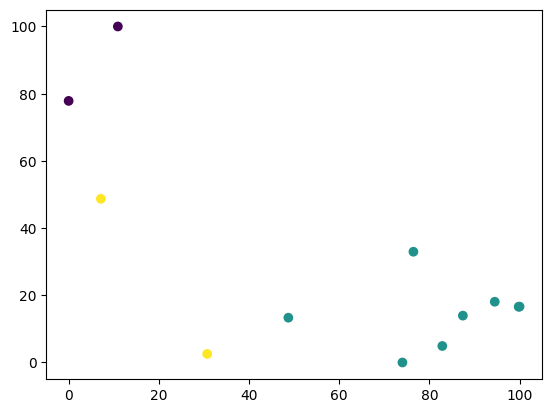

In [19]:
# pintamos los resultados:

plt.scatter(df_flores['Campanilla'], df_flores['Áster'], c = df_flores['kmeans'])

### Conclusiones

¿Qué hemos encontrado?

¿Es esta la representación que estamos buscando?

# Biclustering

Lo que hemos hecho: hemos encontrado agrupaciones de flores con comportamiento similares.

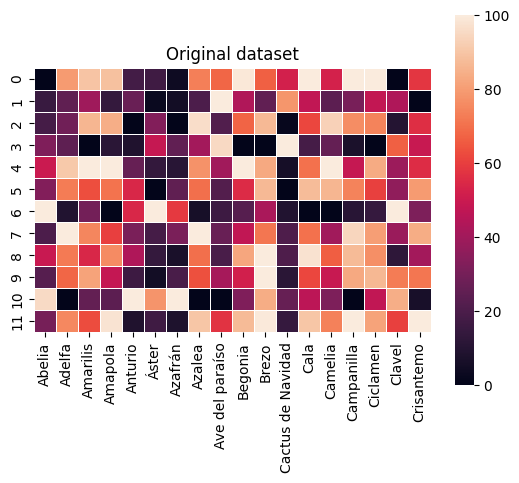

In [20]:
sns.heatmap(df_flores.iloc[:,:-1], square=True, linewidths=.5)
plt.title("Original dataset")
plt.show()

## Spectral coclustering

In [21]:
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score

In [28]:
# aplicamos SpectralCoclustering

# train the data
model = SpectralCoclustering(n_clusters=3, random_state=0)
model.fit(df_flores.iloc[:,:-1])

SpectralCoclustering(random_state=0)

In [29]:
#obtenemos row and columns labels

model.column_labels_

array([0, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1], dtype=int32)

In [30]:
model.row_labels_

array([1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int32)

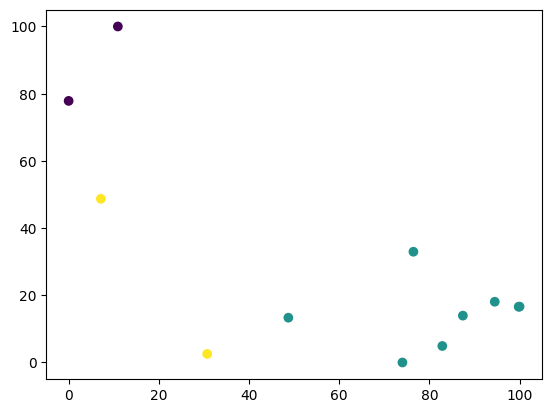

In [25]:
# volvemos a pintar los resultados:

plt.scatter(df_flores['Campanilla'], df_flores['Áster'], c=model.row_labels_)
plt.show()

In [32]:
# pintamos los datos ordenados:

fit_data = df_flores.iloc[:,:-1].iloc[np.argsort(model.row_labels_),:]
fit_data = fit_data.iloc[:, np.argsort(model.column_labels_)]

sns.heatmap(fit_data, square=True, linewidths=.5)
plt.title("Original dataset")
plt.show()

## Tarea

¿Qué me devuelve el algoritmo?

- _biclusters
- column_labels_

¿ Qué conclusiones podemos obtener?